#TNT 3주차 과제 - 정선호
logistic regression 사용

늦어서 죄송합니다

코드가 더럽거나 잘못 사용했을 수 있습니다 ㅜㅜ

#1-(1)

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/3주차 과제/heart attack train.csv')
test = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/3주차 과제/heart attack test.csv')

In [3]:
train.drop('Unnamed: 0',axis=1, inplace=True)
test.drop('Unnamed: 0',axis=1, inplace=True)

In [4]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     in

In [5]:
train = sm.add_constant(train,has_constant="add")
print(train.head())
test = sm.add_constant(test,has_constant="add")
print(test.head())

   const  age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal  target
0    1.0   52    1   3       118   186  ...      0      0.0      1   0     1       1
1    1.0   67    0   2       152   277  ...      0      0.0      2   1     2       1
2    1.0   57    1   2       150   126  ...      0      0.2      2   1     3       1
3    1.0   57    1   1       154   232  ...      0      0.0      2   1     2       0
4    1.0   50    0   1       120   244  ...      0      1.1      2   0     2       1

[5 rows x 15 columns]
   const  age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal  target
0    1.0   62    0   0       160   164  ...      0      6.2      0   3     3       0
1    1.0   56    1   1       130   221  ...      0      0.0      2   0     3       1
2    1.0   48    1   0       130   256  ...      1      0.0      2   2     3       0
3    1.0   60    1   0       130   206  ...      1      2.4      1   2     3       0
4    1.0   50    1   0       150   243  ..

In [6]:
x_train, y_train = train.loc[:, train.columns != 'target'].values, train['target'].values 
x_test, y_test = test.loc[:, test.columns != 'target'].values, test['target'].values


In [7]:
train


,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.0,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
1,1.0,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
2,1.0,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,1.0,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
4,1.0,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.0,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
238,1.0,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
239,1.0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
240,1.0,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0


In [8]:

logit_mod = sm.Logit(y_train,x_train)
results = logit_mod.fit()
results.summary()
#age,chol,fbs,restecg,slope,thal은 	P>|z|가 0.05 이상이므로 유효하지 않은 변수

Optimization terminated successfully.
         Current function value: 0.314361
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           13
Date:                Sat, 16 Jan 2021   Pseudo R-squ.:                  0.5427
Time:                        16:06:16   Log-Likelihood:                -76.075
converged:                       True   LL-Null:                       -166.34
Covariance Type:            nonrobust   LLR p-value:                 1.321e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8430      3.131      1.228      0.220      -2.293       9.979
x1            -0.0197      0.028     -0.712      0.477      -0.074       0.035
x2            -2.6418      0.629     -4.202      0.000      -3.874      -1.410
x3             1.1433      0.232      4.918      0.000       0.688       1.599
x4            -0.0278      0.013     -2.196      0.028      -0.053      -0.003
x5            -0.0058      0.005     -1.246      0.213      -0.015       0.003
x6             0.3069      0.630      0.487      0.626      -0.929       1.543
x7             0.7154      0.426      1.679      0.093      -0.120       1.551
x8             0.0332      0.013      2.559      0.010       0.008       0.059
x9            -1.2074      0.498     -2.423      0.015      -2.184      -0.231
x10           -0.7233      0.264     -2.742      0.006      -1.240      -0.206
x11            0.2506      0.436      0.575      0.565      -0.604       1.105
x12           -0.6887      0.224     -3.074      0.002      -1.128      -0.250
x13           -0.3698      0.344     -1.074      0.283      -1.045       0.305
==============================================================================
"""

In [9]:
y_pred = results.predict(x_test)
y_pred
#test셋에 fit

array([0.00352175, 0.75490177, 0.05873662, 0.00365221, 0.02028705,
       0.00175432, 0.00717717, 0.73427004, 0.00161217, 0.99592298,
       0.27309117, 0.05805007, 0.87232465, 0.20249367, 0.27567876,
       0.96936779, 0.99418943, 0.00930883, 0.44888158, 0.78898622,
       0.99258416, 0.01371419, 0.78569169, 0.99201911, 0.99255774,
       0.79112135, 0.00213045, 0.98913674, 0.92535569, 0.99696781,
       0.96712226, 0.87173302, 0.80383721, 0.8492041 , 0.02923024,
       0.37591958, 0.05495143, 0.26124652, 0.72215692, 0.03717283,
       0.97681375, 0.03221082, 0.15720385, 0.00168495, 0.82121826,
       0.92101104, 0.38596207, 0.8246539 , 0.7281784 , 0.97101635,
       0.96897869, 0.79900393, 0.92432622, 0.78544044, 0.99708999,
       0.99368676, 0.77489149, 0.01198191, 0.75500836, 0.01155672,
       0.51117405])

In [10]:
def cut_off(y,threshold):
  Y = y.copy()
  Y[Y>threshold]=1
  Y[Y<=threshold]=0
  return(Y.astype(int))
pred_Y = cut_off(y_pred,0.5)
pred_Y  
#0.5 초과면 1로 분류, 이하면 0으로 분류

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

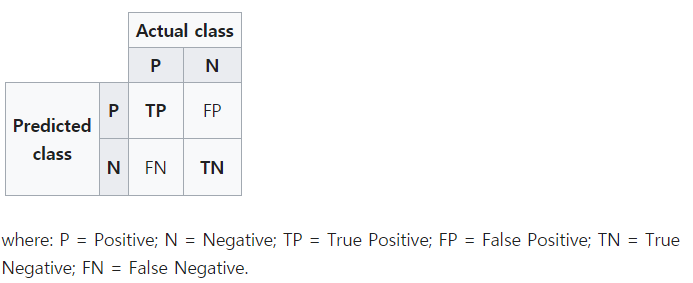

In [11]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cfmat = confusion_matrix(y_test,pred_Y)
print(cfmat)
#test set 오분류와 정확도 알아보기 위해!

[[20 10]
 [ 6 25]]


In [12]:
(cfmat[0,0]+cfmat[1,1])/len(pred_Y)
#정확도

0.7377049180327869

In [13]:
np.exp(results.params) #target과 변수와의 상관관계

array([46.66411502,  0.98046508,  0.07123023,  3.13698979,  0.97254216,
        0.99416871,  1.35917814,  2.04497741,  1.03371787,  0.29897865,
        0.48516072,  1.28483309,  0.502241  ,  0.69087075])

In [14]:
X_train, Y_train =  train[['sex','cp','trestbps','thalach','exang','oldpeak','ca']].values, train['target'].values 
X_test, Y_test =  test[['sex','cp','trestbps','thalach','exang','oldpeak','ca']].values, test['target'].values


In [15]:
logit_mod2 = sm.Logit(Y_train, X_train)
results2 = logit_mod2.fit()
results2.summary()
#위에서 P>|z|가 유의하지 않은 것들을 모두 제외해주었더니 all good

Optimization terminated successfully.
         Current function value: 0.333663
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      235
Method:                           MLE   Df Model:                            6
Date:                Sat, 16 Jan 2021   Pseudo R-squ.:                  0.5146
Time:                        16:06:16   Log-Likelihood:                -80.746
converged:                       True   LL-Null:                       -166.34
Covariance Type:            nonrobust   LLR p-value:                 2.513e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2608      0.530     -4.263      0.000      -3.300      -1.221
x2             1.1248      0.221      5.101      0.000       0.693       1.557
x3            -0.0260      0.010     -2.712      0.007      -0.045      -0.007
x4             0.0382      0.009      4.397      0.000       0.021       0.055
x5            -1.1299      0.463     -2.442      0.015      -2.037      -0.223
x6            -0.8000      0.217     -3.679      0.000      -1.226      -0.374
x7            -0.6560      0.201     -3.263      0.001      -1.050      -0.262
==============================================================================
"""

#1-(2)

아래 상관관계 순서대로(exp 해주면 저게 로그오즈라는 것 같음) 'sex','cp','trestbps','thalach','exang','oldpeak','ca'을 나타낸다. 
아래의 의미는 예를들면 trestbps가 1 증가함에 따라 target이 1이 될 확률이 0.97배 증가한다는 의미이다. cp,trestbps,thalach는 비교적 결과에 큰 영향을 미치고 나머지는 영향력이 미미하다.

In [16]:
np.exp(results2.params)

array([0.10426612, 3.07952371, 0.97436624, 1.03895659, 0.32306848,
       0.44930768, 0.51890902])

In [17]:
Y_pred = results2.predict(X_test)
Y_pred

array([0.00390415, 0.84780416, 0.08737962, 0.00700518, 0.03408002,
       0.00238724, 0.01613852, 0.74941486, 0.00505934, 0.98873733,
       0.51843284, 0.16310746, 0.88993159, 0.30558935, 0.20045639,
       0.97685704, 0.99097807, 0.03999949, 0.30555362, 0.93184824,
       0.98246472, 0.00952908, 0.89756407, 0.98172189, 0.9917114 ,
       0.59690235, 0.00433636, 0.98056688, 0.79460522, 0.99706243,
       0.91258481, 0.82392776, 0.81180987, 0.89056809, 0.045878  ,
       0.52051963, 0.04825184, 0.32092673, 0.71524226, 0.05540529,
       0.95338193, 0.0182051 , 0.06711207, 0.00316356, 0.70005831,
       0.95617837, 0.14909464, 0.81806261, 0.6702497 , 0.97171876,
       0.92903589, 0.80946244, 0.91226506, 0.77999116, 0.99668738,
       0.98449957, 0.77566529, 0.02107575, 0.68627515, 0.01564765,
       0.52030647])

In [18]:
pred_Y2 = cut_off(Y_pred,0.5)
pred_Y2  

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [19]:
cfmat = confusion_matrix(Y_test,pred_Y2)
print(cfmat)

[[20 10]
 [ 4 27]]


In [20]:
(cfmat[0,0]+cfmat[1,1])/len(pred_Y2)
#변수선택 전보다 정확도 향상

0.7704918032786885

#1-(3)
test의 오분류율은 0.22이다.

In [21]:
(cfmat[0,1]+cfmat[1,0])/len(pred_Y2)

0.22950819672131148

#2-(1)

In [22]:
train = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/3주차 과제/satisfaction_train.csv')
test = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/3주차 과제/satisfaction_test.csv')

In [23]:
print(train.head())
print(test.head())

   Unnamed: 0  Gender  ... Arrival Delay in Minutes  satisfaction
0      105527  Female  ...                     65.0     satisfied
1       82617  Female  ...                     37.0  dissatisfied
2       34069  Female  ...                      0.0     satisfied
3       18636    Male  ...                    567.0  dissatisfied
4       28693  Female  ...                     72.0     satisfied

[5 rows x 24 columns]
   Unnamed: 0  Gender  ... Arrival Delay in Minutes  satisfaction
0       25158    Male  ...                     81.0  dissatisfied
1      116365    Male  ...                     60.0     satisfied
2       55540    Male  ...                      0.0  dissatisfied
3       58339  Female  ...                     20.0  dissatisfied
4      109669  Female  ...                     13.0     satisfied

[5 rows x 24 columns]


In [24]:
train.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51794 entries, 0 to 51793
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             51794 non-null  object 
 1   Customer Type                      51794 non-null  object 
 2   Age                                51794 non-null  int64  
 3   Type of Travel                     51794 non-null  object 
 4   Class                              51794 non-null  object 
 5   Flight Distance                    51794 non-null  int64  
 6   Seat comfort                       51794 non-null  int64  
 7   Departure/Arrival time convenient  51794 non-null  int64  
 8   Food and drink                     51794 non-null  int64  
 9   Gate location                      51794 non-null  int64  
 10  Inflight wifi service              51794 non-null  int64  
 11  Inflight entertainment             51794 non-null  int

In [26]:
print(train['Gender'])
print(train['Customer Type'])
print(train['Type of Travel'])
print(train['Class'])
print(train['satisfaction'])

0        Female
1        Female
2        Female
3          Male
4        Female
          ...  
51789      Male
51790      Male
51791    Female
51792      Male
51793      Male
Name: Gender, Length: 51794, dtype: object
0        Loyal Customer
1        Loyal Customer
2        Loyal Customer
3        Loyal Customer
4        Loyal Customer
              ...      
51789    Loyal Customer
51790    Loyal Customer
51791    Loyal Customer
51792    Loyal Customer
51793    Loyal Customer
Name: Customer Type, Length: 51794, dtype: object
0        Business travel
1        Business travel
2        Personal Travel
3        Personal Travel
4        Personal Travel
              ...       
51789    Business travel
51790    Business travel
51791    Business travel
51792    Business travel
51793    Personal Travel
Name: Type of Travel, Length: 51794, dtype: object
0        Business
1        Business
2        Eco Plus
3        Eco Plus
4             Eco
           ...   
51789         Eco
51790    Busine

In [27]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
e = LabelEncoder()
e.fit(train['Gender'])
train['Gender'] = e.transform(train['Gender'].values)

e.fit(train['Customer Type'])
train['Customer Type'] = e.transform(train['Customer Type'])


e.fit(train['Type of Travel'])
train['Type of Travel'] = e.transform(train['Type of Travel'])

#encoder.fit(train['Class'])
#train['Class'] = encoder.transform(train['Class'])


e.fit(train['satisfaction'])
train['satisfaction'] = e.transform(train['satisfaction'])

print(train)

       Gender  Customer Type  ...  Arrival Delay in Minutes  satisfaction
0           0              0  ...                      65.0             1
1           0              0  ...                      37.0             0
2           0              0  ...                       0.0             1
3           1              0  ...                     567.0             0
4           0              0  ...                      72.0             1
...       ...            ...  ...                       ...           ...
51789       1              0  ...                       0.0             0
51790       1              0  ...                       0.0             1
51791       0              0  ...                       0.0             1
51792       1              0  ...                       0.0             1
51793       1              0  ...                       0.0             0

[51794 rows x 23 columns]


In [28]:
import pandas as pd

train=train.join(pd.get_dummies(train['Class']))


In [29]:
train.drop('Class',axis=1,inplace=True)
train

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,0,0,39,0,2725,5,5,2,5,4,4,5,4,4,4,4,4,4,4,73,65.0,1,1,0,0
1,0,0,27,0,1634,3,3,3,3,3,3,3,3,3,4,4,2,3,3,39,37.0,0,1,0,0
2,0,0,21,1,1341,4,4,0,1,1,0,1,1,4,1,3,5,4,1,0,0.0,1,0,0,1
3,1,0,64,1,3794,2,5,2,4,2,1,1,5,3,3,5,1,4,1,570,567.0,0,0,0,1
4,0,0,69,1,1237,5,5,5,5,4,5,5,5,5,5,5,3,5,4,69,72.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51789,1,0,49,0,2430,2,1,1,1,3,2,3,3,3,2,2,1,3,3,9,0.0,0,0,1,0
51790,1,0,43,0,1820,1,1,1,1,3,5,5,4,4,4,4,4,4,3,2,0.0,1,1,0,0
51791,0,0,49,0,1306,4,4,1,4,5,5,4,4,4,4,4,3,4,3,13,0.0,1,1,0,0
51792,1,0,39,0,3879,1,1,1,1,3,5,5,5,5,5,5,4,5,5,0,0.0,1,1,0,0


In [30]:
e.fit(test['Gender'])
test['Gender'] = e.transform(test['Gender'].values)

e.fit(test['Customer Type'])
test['Customer Type'] = e.transform(test['Customer Type'])


e.fit(test['Type of Travel'])
test['Type of Travel'] = e.transform(test['Type of Travel'])

#encoder.fit(train['Class'])
#train['Class'] = encoder.transform(train['Class'])


e.fit(test['satisfaction'])
test['satisfaction'] = e.transform(test['satisfaction'])

In [31]:
import pandas as pd

test=test.join(pd.get_dummies(test['Class']))


In [32]:
test.drop('Class',axis=1,inplace=True)


In [33]:
train1 = sm.add_constant(train,has_constant="add")
train1.head()
test = sm.add_constant(test,has_constant="add")
test.head()

,const,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,1.0,1,0,53,1,2342,3,4,3,2,3,3,3,3,4,4,4,3,4,3,51,81.0,0,0,1,0
1,1.0,1,0,44,0,2648,4,4,4,4,2,1,3,5,5,5,5,4,5,2,2,60.0,1,1,0,0
2,1.0,1,1,33,0,1994,3,3,3,5,4,3,4,4,3,4,5,5,5,4,0,0.0,0,1,0,0
3,1.0,0,1,43,0,1613,4,3,5,3,1,5,1,1,3,5,3,3,4,1,12,20.0,0,0,1,0
4,1.0,0,0,53,0,2075,1,1,1,1,3,3,4,5,5,4,5,4,5,3,8,13.0,1,1,0,0


In [34]:
x_train, y_train = train1.loc[:, train1.columns != 'satisfaction'].values, train1['satisfaction'].values 
x_test, y_test = test.loc[:, test.columns != 'satisfaction'].values, test['satisfaction'].values

In [35]:

logit_mod = sm.Logit(y_train,x_train)
results = logit_mod.fit()
results.summary()
#departure delay in minute은 	P>|z|가 0.05 이상이므로 유효하지 않은 변수
#원핫인코딩 해준 변수들은 항상 저렇게 x22,23,24처럼 1로 나오던데 어떻게 해결하는지 모르겠다..! ㅜㅜ

Optimization terminated successfully.
         Current function value: 0.387549
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                51794
Model:                          Logit   Df Residuals:                    51770
Method:                           MLE   Df Model:                           23
Date:                Sat, 16 Jan 2021   Pseudo R-squ.:                  0.4375
Time:                        16:06:18   Log-Likelihood:                -20073.
converged:                       True   LL-Null:                       -35683.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9949   8.61e+05  -4.64e-06      1.000   -1.69e+06    1.69e+06
x1            -0.9390      0.026    -36.204      0.000      -0.990      -0.888
x2            -1.9252      0.039    -48.943      0.000      -2.002      -1.848
x3            -0.0080      0.001     -8.792      0.000      -0.010      -0.006
x4            -0.7590      0.037    -20.579      0.000      -0.831      -0.687
x5            -0.0001   1.36e-05     -7.795      0.000      -0.000   -7.93e-05
x6             0.2854      0.015     19.624      0.000       0.257       0.314
x7            -0.2075      0.011    -19.334      0.000      -0.229      -0.186
x8            -0.2187      0.015    -14.820      0.000      -0.248      -0.190
x9             0.1250      0.012     10.378      0.000       0.101       0.149
x10           -0.0775      0.014     -5.507      0.000      -0.105      -0.050
x11            0.6904      0.013     52.473      0.000       0.665       0.716
x12            0.0939      0.014      6.585      0.000       0.066       0.122
x13            0.2126      0.018     11.542      0.000       0.176       0.249
x14            0.2823      0.013     21.716      0.000       0.257       0.308
x15            0.2306      0.011     20.879      0.000       0.209       0.252
x16            0.1038      0.015      7.064      0.000       0.075       0.133
x17            0.2976      0.011     27.089      0.000       0.276       0.319
x18            0.0969      0.015      6.347      0.000       0.067       0.127
x19            0.1728      0.016     11.003      0.000       0.142       0.204
x20            0.0020      0.001      1.609      0.108      -0.000       0.005
x21           -0.0072      0.001     -5.815      0.000      -0.010      -0.005
x22           -0.8153   8.61e+05  -9.46e-07      1.000   -1.69e+06    1.69e+06
x23           -1.5449   8.61e+05  -1.79e-06      1.000   -1.69e+06    1.69e+06
x24           -1.6348   8.61e+05   -1.9e-06      1.000   -1.69e+06    1.69e+06
==============================================================================
"""

In [36]:
np.exp(results.params)

array([0.0184084 , 0.39103724, 0.14584674, 0.9920812 , 0.46812275,
       0.99989402, 1.33032439, 0.81261357, 0.80356294, 1.1330936 ,
       0.92541335, 1.99456672, 1.09842907, 1.23684864, 1.32616316,
       1.25934315, 1.10942762, 1.34658357, 1.10177959, 1.18865794,
       1.00203601, 0.99279146, 0.44250826, 0.21333343, 0.195001  ])

In [37]:
y_pred = results.predict(x_test)
y_pred

array([0.1485863 , 0.52774643, 0.49839865, ..., 0.93273388, 0.11971635,
       0.00597283])

In [38]:
def cut_off(y,threshold):
  Y = y.copy()
  Y[Y>threshold]=1
  Y[Y<=threshold]=0
  return(Y.astype(int))
pred_Y = cut_off(y_pred,0.5)
pred_Y 

array([0, 1, 0, ..., 1, 0, 0])

In [39]:
cfmat = confusion_matrix(y_test,pred_Y)
print(cfmat)

[[4804 1074]
 [1054 6017]]


In [40]:
(cfmat[0,0]+cfmat[1,1])/len(pred_Y)

0.8356629855587304

#2-(2)
test misclassification rate

In [41]:
(cfmat[0,1]+cfmat[1,0])/len(pred_Y)

0.1643370144412696